# CSE 510 Project 3 - Thankam Abish

### Part I

Hello Professor and TA,
I had problems with my laptop and original jupyter notebook, and decided to use today to redo this but I wasn't able to remember all the models I had created so I have noted the final models that I had saved separately and given explanations of the process and adjustments I remembered making. I took an extra day hoping I would be able to revive my old notebook from my laptop and make improvements on this project. In general this project has been very difficult for me working alone even with starting early and working on it for long hours since I have no experience in computer vision and neural networks. I am working from scratch from an older laptop of mine. I hope you understand this is not my best work when grading, and these circumstances were out of my control. Thank you :)

In [94]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras import regularizers
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras import regularizers
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU

In [95]:
# input image dimensions
img_rows, img_cols = 28, 28

from keras.datasets import fashion_mnist
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

In [96]:
batch_size = 128
num_classes = 10
epochs = 12

([], <a list of 0 Text yticklabel objects>)

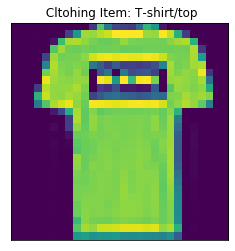

In [97]:
labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(trainX[1])
plt.title(" Cltohing Item: " + str(labels[trainy[1]]))
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text yticklabel objects>)

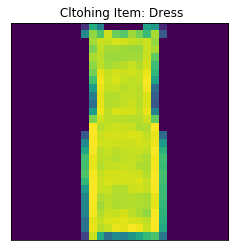

In [98]:
labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(trainX[58])
plt.title(" Cltohing Item: " + str(labels[trainy[58]]))
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text yticklabel objects>)

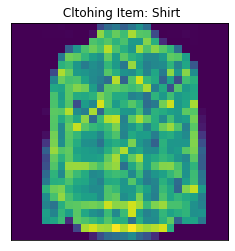

In [99]:
labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(trainX[32])
plt.title(" Cltohing Item: " + str(labels[trainy[32]]))
plt.xticks([])
plt.yticks([])

In [100]:
trainX = trainX.reshape(trainX.shape[0], img_rows, img_cols, 1)
testX = testX.reshape(testX.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

trainX = trainX.astype('float32')
testX = testX.astype('float32')
trainX /= 255
testX /= 255
print('trainX shape:', trainX.shape)
print('testX shape:', testX.shape)

print(trainX.shape[0], 'train samples')
print(testX.shape[0], 'test samples')
trainy = keras.utils.to_categorical(trainy, num_classes)
testy = keras.utils.to_categorical(testy, num_classes)

trainX shape: (60000, 28, 28, 1)
testX shape: (10000, 28, 28, 1)
60000 train samples
10000 test samples


##### Initially model done before Part II originally had relu as activiation function, no regularizers, or batch normalization, or dropout, it performed relatively well still somewhere in the 70s range

##### The validation accuracy reached somewhere in the 70s region

In [101]:
input_shape = (28, 28, 1)
num_classes = 10
epochs = 12
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='linear', input_shape=input_shape, kernel_regularizer=regularizers.l2(0.0002)))
#, kernel_regularizer=regularizers.l2(0.05)
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, kernel_size=(3,3), activation='linear', input_shape=input_shape, kernel_regularizer=regularizers.l2(0.0002)))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, kernel_size=(3,3), activation='linear', input_shape=input_shape, kernel_regularizer=regularizers.l2(0.0002)))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.0002)))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

In [102]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [103]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 26, 26, 32)        0         
_________________________________________________________________
batch_normalization_45 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_51 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
leaky_re_lu_22 (LeakyReLU)   (None, 11, 11, 64)      

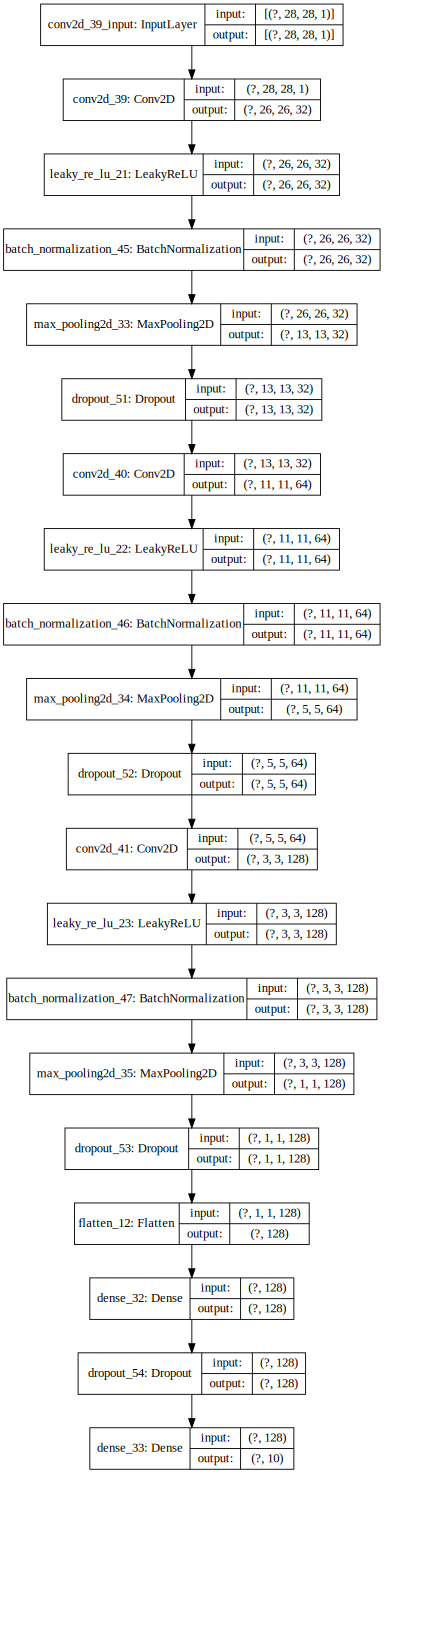

In [104]:
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model
from IPython.display import Image, display, SVG

plot_model(model, to_file='model.png')
SVG(model_to_dot(model, show_layer_names=True, show_shapes=True, rankdir='TB',dpi=65).create(prog='dot', format='svg'))

In [105]:
history = model.fit(trainX,trainy,
              epochs=epochs,
              verbose=1,
              validation_data=(testX, testy))

Epoch 1/12
1875/1875 [==============================] - 97s 52ms/step - loss: 0.7536 - accuracy: 0.7501 - val_loss: 0.5053 - val_accuracy: 0.8400
Epoch 2/12
1875/1875 [==============================] - 100s 53ms/step - loss: 0.5588 - accuracy: 0.8213 - val_loss: 0.4801 - val_accuracy: 0.8474
Epoch 3/12
1875/1875 [==============================] - 138s 73ms/step - loss: 0.5245 - accuracy: 0.8364 - val_loss: 0.4547 - val_accuracy: 0.8613
Epoch 4/12
1875/1875 [==============================] - 109s 58ms/step - loss: 0.5067 - accuracy: 0.8458 - val_loss: 0.4440 - val_accuracy: 0.8659
Epoch 5/12
1875/1875 [==============================] - 130s 69ms/step - loss: 0.4937 - accuracy: 0.8534 - val_loss: 0.4468 - val_accuracy: 0.8678
Epoch 6/12
1875/1875 [==============================] - 143s 76ms/step - loss: 0.4894 - accuracy: 0.8561 - val_loss: 0.4402 - val_accuracy: 0.8703
Epoch 7/12
1875/1875 [==============================] - 135s 72ms/step - loss: 0.4834 - accuracy: 0.8580 - val_loss: 0.

In [106]:
score = model.evaluate(testX, testy, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4244370460510254
Test accuracy: 0.8799999952316284


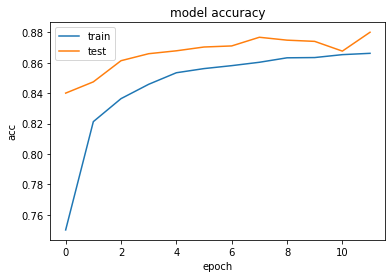

In [107]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

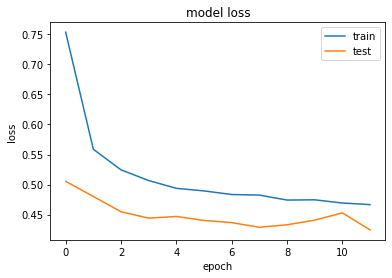

In [108]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

In [111]:
from sklearn.metrics import confusion_matrix
import numpy as np

test_predictions = model.predict_classes(testX)

cm = confusion_matrix(np.argmax(testy, axis=1), test_predictions)
print(cm)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[[785   0  29  34   4   2 138   0   8   0]
 [  0 959   3  28   4   1   3   0   2   0]
 [  8   0 824  11  64   0  91   0   2   0]
 [ 11   0  23 902  26   0  37   0   1   0]
 [  0   0  45  30 787   0 136   0   2   0]
 [  0   0   0   2   0 959   0  23   1  15]
 [ 66   0  85  34  84   0 712   0  19   0]
 [  0   0   0   0   0  14   0 926   0  60]
 [  0   0   1   5   3   5  10   0 974   2]
 [  0   0   0   0   0   6   0  21   1 972]]


Text(0.5, 1, 'Accuracy Score: 0.8799999952316284')

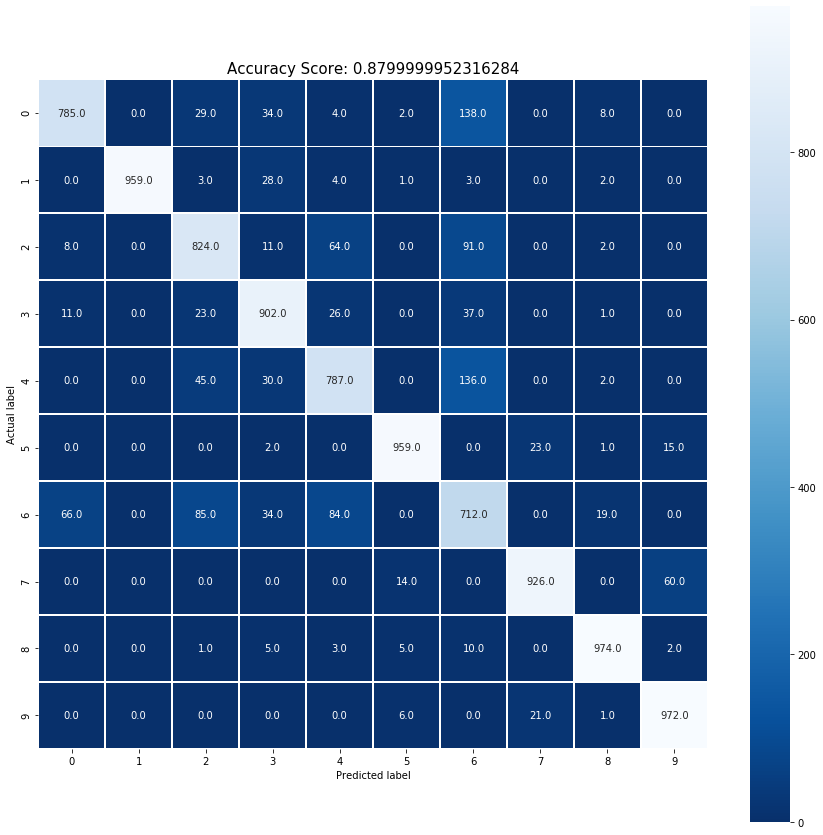

In [112]:
import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score[1])
plt.title(all_sample_title, size = 15)

##### This model is trained using horizonal flip of image and or vertical flip of image
##### I was unable to figure out how to keep labels while creating new image augmentations, but originally I had horizontal and vertical flip as on augmentation of the whole dataset, and two variations of shifts for the second and third changes to the entire dataset. I wasn't able to join these together to run this model so I adjusted it to run using just the flips.

In [113]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import sys

data_gen1 = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

image_gen = data_gen1.flow(trainX, trainy, batch_size=32)
test_gen = data_gen1.flow(testX, testy, batch_size=32)

In [114]:
history = model.fit(image_gen,
              epochs=epochs,
              verbose=1,
              validation_data=test_gen)

Epoch 1/12
1875/1875 [==============================] - 100s 53ms/step - loss: 0.6923 - accuracy: 0.7879 - val_loss: 0.5440 - val_accuracy: 0.8336
Epoch 2/12
1875/1875 [==============================] - 139s 74ms/step - loss: 0.6256 - accuracy: 0.8133 - val_loss: 0.5320 - val_accuracy: 0.8364
Epoch 3/12
1875/1875 [==============================] - 115s 61ms/step - loss: 0.6083 - accuracy: 0.8185 - val_loss: 0.5445 - val_accuracy: 0.8380
Epoch 4/12
1875/1875 [==============================] - 139s 74ms/step - loss: 0.6013 - accuracy: 0.8220 - val_loss: 0.5464 - val_accuracy: 0.8348
Epoch 5/12
1875/1875 [==============================] - 1767s 942ms/step - loss: 0.5967 - accuracy: 0.8232 - val_loss: 0.5662 - val_accuracy: 0.8287
Epoch 6/12
1875/1875 [==============================] - 113s 60ms/step - loss: 0.5959 - accuracy: 0.8241 - val_loss: 0.5202 - val_accuracy: 0.8499
Epoch 7/12
1875/1875 [==============================] - 106s 56ms/step - loss: 0.5898 - accuracy: 0.8275 - val_loss:

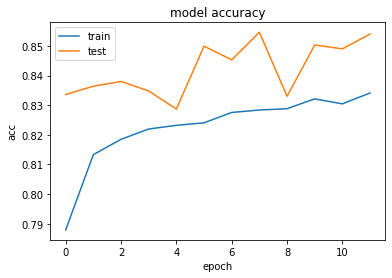

In [115]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

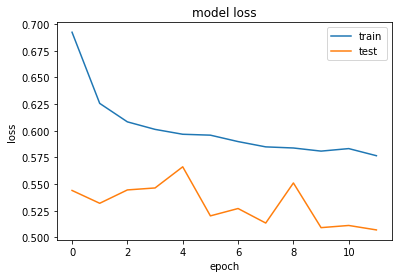

In [116]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

### Part III

For this part, I used the code from Nitin's demo to download classes of images included
acropolis, aircraft, alarm clock, bag, bear, boa, camel, computer, cow, food, hawk, jellyfish, kangaroo, motorcycling, pay-phone, plant, rollerblading, shield, skeleton key, and sledding

In [117]:
import pathlib
data_dir = pathlib.Path('C:/Users/Thank/Documents/GraduateSchool/EAS510/Project3/images')
image_count = len(list(data_dir.glob('*/*.jpg')))
print('Verify number of images: ', image_count)

Verify number of images:  10000


Sample image from director:


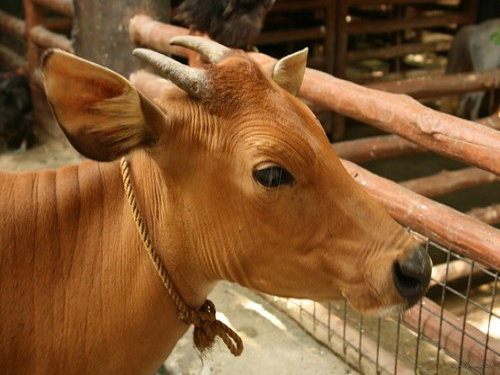

In [118]:
import PIL
import PIL.Image
cow = list(data_dir.glob('cow/*'))
print('Sample image from director:')
PIL.Image.open(str(cow[0]))

##### Split data into training and validation by 75:25

In [119]:
from keras.preprocessing.image import ImageDataGenerator

imagegen = ImageDataGenerator()
# load train data
train = imagegen.flow_from_directory('C:/Users/Thank/Documents/GraduateSchool/EAS510/Project3/output/train', class_mode="categorical", shuffle=False, batch_size=128, target_size=(50, 50))
# load val data
val = imagegen.flow_from_directory('C:/Users/Thank/Documents/GraduateSchool/EAS510/Project3/output/val', class_mode="categorical", shuffle=False, batch_size=128, target_size=(50, 50))

Found 7500 images belonging to 20 classes.
Found 2500 images belonging to 20 classes.


##### I used a variation of convolutional neural network used for FashionMNIST data

##### My first adjustment was different regularizer L2 values, I tested 0.002 and 0.5 and decided 0.005 gave best results and balance in training and validation accuracy and loss

##### Another attempt was checking LeakyReLU with linear activation compared to just relu, and I felt relu gave better results

##### Another adjustment was made with taking out kernel regularizer and leaving only dropout, but this did not work well because model became extremely overfit and training gave 80% accuracy where testing reached around 20%

##### Another adjustment I made was to add another Convolutional layer right after the first convolutional layer using the same parameters, but this also took more time with little value

##### Setting epoch at a higher number than 12 led to a lot of overfitting

In [ ]:
num_classes = 20
epochs = 12
input_shape = (50, 50, 3)

In [74]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape, kernel_regularizer=regularizers.l2(0.005)))
#, kernel_regularizer=regularizers.l2(0.05)
#model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=input_shape, kernel_regularizer=regularizers.l2(0.005)))
#model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape, kernel_regularizer=regularizers.l2(0.005)))
#model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [75]:
history = model.fit(train,
              epochs=epochs,
              verbose=1,
              validation_data=val)

Epoch 1/12
59/59 [==============================] - 76s 1s/step - loss: 4.1468 - accuracy: 0.0440 - val_loss: 3.6315 - val_accuracy: 0.0556
Epoch 2/12
59/59 [==============================] - 66s 1s/step - loss: 3.6001 - accuracy: 0.0456 - val_loss: 3.5025 - val_accuracy: 0.0744
Epoch 3/12
59/59 [==============================] - 64s 1s/step - loss: 3.4829 - accuracy: 0.0551 - val_loss: 3.4065 - val_accuracy: 0.0916
Epoch 4/12
59/59 [==============================] - 98s 2s/step - loss: 3.3889 - accuracy: 0.0653 - val_loss: 3.3585 - val_accuracy: 0.0804
Epoch 5/12
59/59 [==============================] - 80s 1s/step - loss: 3.3322 - accuracy: 0.0717 - val_loss: 3.5725 - val_accuracy: 0.0804
Epoch 6/12
59/59 [==============================] - 68s 1s/step - loss: 3.2715 - accuracy: 0.0700 - val_loss: 4.8621 - val_accuracy: 0.0692
Epoch 7/12
59/59 [==============================] - 67s 1s/step - loss: 3.1936 - accuracy: 0.0981 - val_loss: 3.1898 - val_accuracy: 0.0888
Epoch 8/12
59/59 [==

In [83]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
batch_normalization_42 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_47 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
batch_normalization_43 (Batc (None, 22, 22, 64)        256       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 11, 11, 64)      

In [ ]:
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model
from IPython.display import Image, display, SVG

plot_model(model, to_file='model2.png')
SVG(model_to_dot(model, show_layer_names=True, show_shapes=True, rankdir='TB',dpi=65).create(prog='dot', format='svg'))

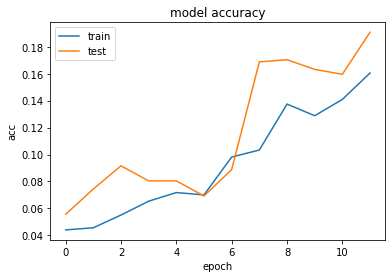

In [92]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

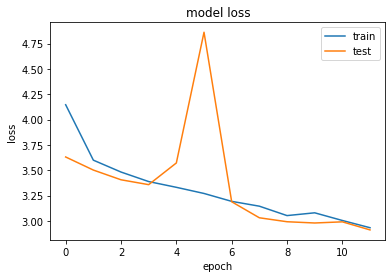

In [93]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')